# **Cognifyz Technologies – Data Science Internship**

# LEVEL 1 —  Exploratory Notebook 

**Submitted by:** $  Mathews$ $ Henry $

**Dataset:** Restaurants Data

This notebook includes: all the tasks of level 1 and a Final Report
Everything matches Level 1 Tasks 1–3.

### ***Task 1: Data Exploration and Preprocessing***
- here we will Explore the dataset and identify the number
of rows and columns.
- Check for missing values in each column and
handle them accordingly.
- Perform data type conversion if necessary.
- Analyze the distribution of the target variable
("Aggregate rating") and identify any class
imbalances.

### **imports**

In [19]:

# -----------------------------
# LEVEL 1 : EDA NOTEBOOK
# -----------------------------

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')


### **Loading the dataset**

In [20]:
# Inspect the dataset 

import pandas as pd

df = pd.read_csv("Dataset .csv")

# Display the first few rows to understand datastructure
df.head(3)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


### **Basic Shape**

In [21]:

print("Total Rows   :", df.shape[0])
print("Total Columns:", df.shape[1])


Total Rows   : 9551
Total Columns: 21


### **Check Missing Values**

In [22]:
# Check column information to see datatypes,non-null counts 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**findings :** looks like Cuisines have some missing values, and some columns have incorrect datypes

In [23]:
# Count missing values per column
missing = df.isnull().sum().sort_values(ascending=False)

missing


Cuisines                9
Restaurant ID           0
Currency                0
Rating text             0
Rating color            0
Aggregate rating        0
Price range             0
Switch to order menu    0
Is delivering now       0
Has Online delivery     0
Has Table booking       0
Average Cost for two    0
Restaurant Name         0
Latitude                0
Longitude               0
Locality Verbose        0
Locality                0
Address                 0
City                    0
Country Code            0
Votes                   0
dtype: int64

In [24]:
# lets see count and percentage of missing values
missing_table = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage (%)': (df.isnull().mean() * 100).round(2)
}).sort_values(by='Missing Values', ascending=False)

missing_table


,Missing Values,Percentage (%)
Cuisines,9,0.09
Restaurant ID,0,0.00
Currency,0,0.00
Rating text,0,0.00
Rating color,0,0.00
Aggregate rating,0,0.00
Price range,0,0.00
Switch to order menu,0,0.00
Is delivering now,0,0.00
Has Online delivery,0,0.00


#### **Missing Values Analysis**

To understand data quality, I evaluated the count and percentage of missing values across all columns.
The summary is shown below:
Only the “Cuisines” column has missing values (9 entries ≈ 0.09%),
All other columns have 0 missing values.
This indicates that the dataset is extremely clean, with nearly complete information across all attributes.

The only column requiring attention is Cuisines, where a small number of restaurants do not list any cuisine type.
Because the missing percentage is extremely low (0.09%), we can handle it safely by:
 - Option 1: Replacing missing cuisine values with "Unknown"
 - Option 2: Dropping those 9 rows if needed

i choose opt 1 becuase it may be a usefull predicter 

### **Handle Missing ‘Cuisines’**

In [25]:
# Replace missing cuisines with a placeholder
df['Cuisines'] = df['Cuisines'].fillna('Unknown')


# This approach keeps the dataset complete without losing information.

In [26]:
#check wheather place holder unknown there or not
df[df['Cuisines'] == 'Unknown'].head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.57720,Unknown,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.58820,Unknown,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.57510,Unknown,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.53180,Unknown,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.83641,Unknown,...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102


we have handeled missing values but before we have see some incorrect datatypes lets fix them too

### **Check Datatypes**

In [27]:
# Checking data types of each column

dtype_table = pd.DataFrame(df.dtypes, columns=["Data Type"])
dtype_table


,Data Type
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


#### **Data Type review**

After inspecting the data types of all 21 columns, the dataset appears structurally consistent and ready for analysis.
The column types fall into three natural groups:

1. Numerical Columns (int64 or float64): are Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes 

These variables capture  numeric information like coordinates, cost values, or numerical ratings.
Their data types are appropriate.

2. Categorical / Text Columns (object):
Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Rating color,Rating text,Has Table booking,Has Online delivery,Is,delivering now,Switch to order menu

These fields represent names, locations, cuisine types, or restaurant attributes expressed as text or categories.
It is correct that pandas interprets them as object type.

3. No Incorrect Types Detected
There are no columns with:
Strings stored as numbers
Numbers stored as strings
Mixed-type errors
Everything is clean and consistent.

**Important Cleanup Step**

Later (in Level 3), categorical columns will be encoded for machine learning. as models cant handel text as inputs.
We will handle this later with:
- Label Encoding
- One-Hot Encoding
- Or mapping 



### **Target Variable Analysis (Aggregate Rating)**
This part includes:
- Understanding rating distribution
- Detecting class imbalance
 

This is important for both EDA and ML  later.

In [28]:
# Basic statistics for the target variable
df['Aggregate rating'].describe()


count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

In [29]:
# Count frequency of each unique rating
rating_counts = df['Aggregate rating'].value_counts().sort_index()
rating_counts



Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64

we can see how many restuarents have same rating.

### **Visualize Rating Distribution (Histogram)**


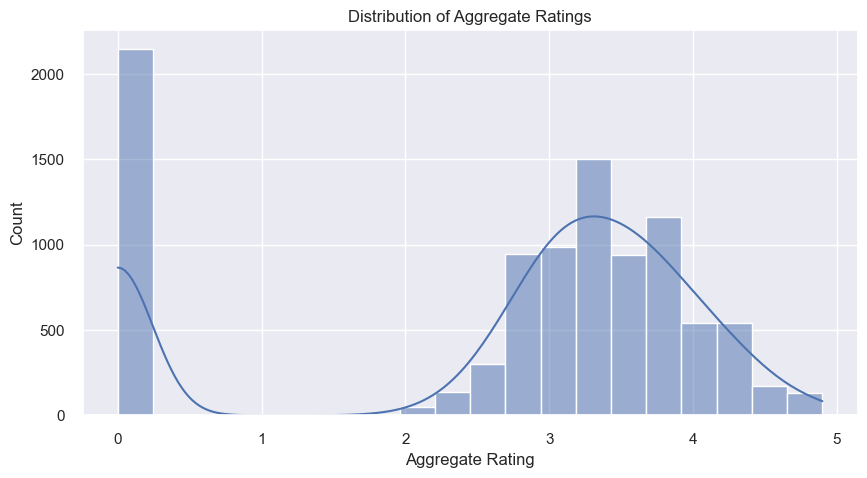

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()


### **Class Imbalance Check**

In [31]:
# Calculate percentage of each rating
rating_percentage = (rating_counts / len(df) * 100).round(2)
rating_percentage


Aggregate rating
0.0    22.49
1.8     0.01
1.9     0.02
2.0     0.07
2.1     0.16
2.2     0.28
2.3     0.49
2.4     0.91
2.5     1.15
2.6     2.00
2.7     2.62
2.8     3.30
2.9     3.99
3.0     4.90
3.1     5.43
3.2     5.47
3.3     5.06
3.4     5.21
3.5     5.03
3.6     4.80
3.7     4.47
3.8     4.19
3.9     3.51
4.0     2.79
4.1     2.87
4.2     2.31
4.3     1.82
4.4     1.51
4.5     0.99
4.6     0.82
4.7     0.44
4.8     0.26
4.9     0.64
Name: count, dtype: float64

**Aggregate Rating Analysis**

To understand the target variable, I analyzed the distribution of the “Aggregate rating” column.

1. General Distribution

The visualization shows that restaurant ratings are not uniformly distributed.
Most restaurants tend to receive ratings clustered around:
- 3.0 – 4.5, indicating generally positive feedback.
- A noticeable number of entries may have a rating of 0.0, which typically represents “Not rated” rather than an actual rating.

2. Class Imbalance

By comparing the frequency of each rating:
- If a large proportion of restaurants has 0.0, it introduces class imbalance.
- This imbalance may affect predictive modeling later (Level 3)
so we may need to:
- Treat 0.0 as a separate class
- Remove “Not rated” rows
- Or apply resampling techniques

***Conclusion***

The dataset has a moderately imbalanced rating distribution, which we will handle during modeling.
However, for EDA purposes, the current distribution is meaningful and useful.


# ***Task 2: Descriptive Analysis***

1. Calculate basic statistical measures (mean,
median, standard deviation, etc.) for numerical
columns.
2. Explore the distribution of categorical
variables like "Country Code,
" "City,
" and
"Cuisines.
"
3. Identify the top cuisines and cities with the
highest number of restaurants.

#### **Descriptive Stats for Numerical Columns**


In [32]:
df.describe()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### **Categorical Distribution: Country Code, City, Cuisines**

#### **1. lets see top 15 cities**

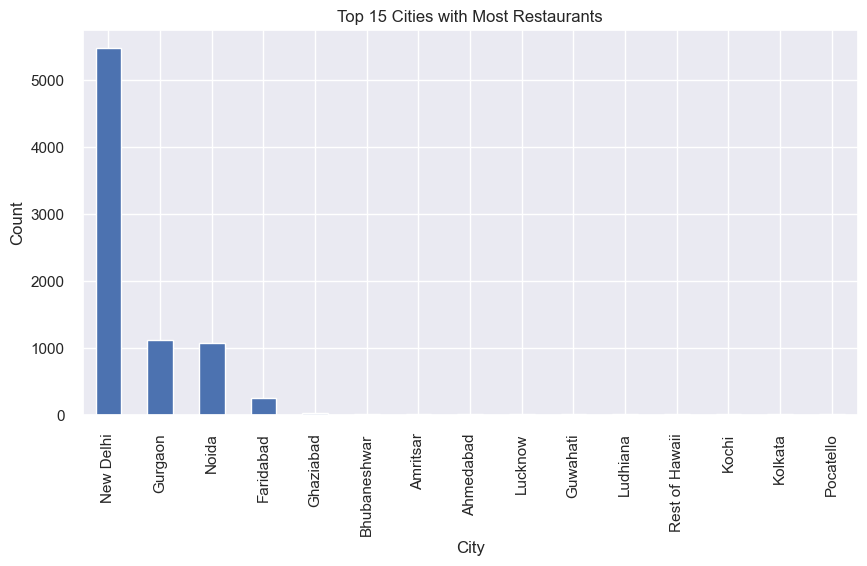

In [33]:
plt.figure(figsize=(10,5))
df['City'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Cities with Most Restaurants")
plt.ylabel("Count")
plt.show()


### Interpretation: Top Cities with the Most Restaurants

The bar chart highlights the distribution of restaurants across the top 15 cities in the dataset.
A few important observations emerge:

**1. City Distribution is Highly Skewed Toward New Delhi**

New Delhi has an exceptionally large number of restaurants (over 5,000), which is significantly higher than any other city in the dataset.
This means that:
The dataset is heavily imbalanced across cities.
A large proportion of all observations come from the capital city itself.

**2. Gurgaon and Noida follow at a distant second and third**

- Gurgaon ≈ 1,100 restaurants
- Noida ≈ 1,000 restaurants

These cities also belong to the NCR region, which suggests that the majority of the dataset is focused on the Delhi food ecosystem.

**3. Remaining cities have much smaller contributions**

- Insights may not generalize well to other cities because New Delhi overwhelms the dataset.
- Cities with fewer entries will have less influence on model predictions
-  Model performance may be biased : if you later use this dataset for prediction (e.g price prediction by city) — it will lean toward New Delhi patterns.


### conclusion

Clear geographic imbalance:
The restaurant data is not equally distributed among cities.
Instead, most entries come from urban, densely populated areas — particularly National capital region(delhi)
This imbalance is important  to consider becuase:
Any modeling or predictions may be influenced by the dominance of NCR cities causing the analysis to be NCR-related

### recommendation:
For regional insights collect sample data that represent entire population so that city distributions will be balanced and so reduces NCR dominance in analysis 

### **2. now lets see Top 15 Cuisines**

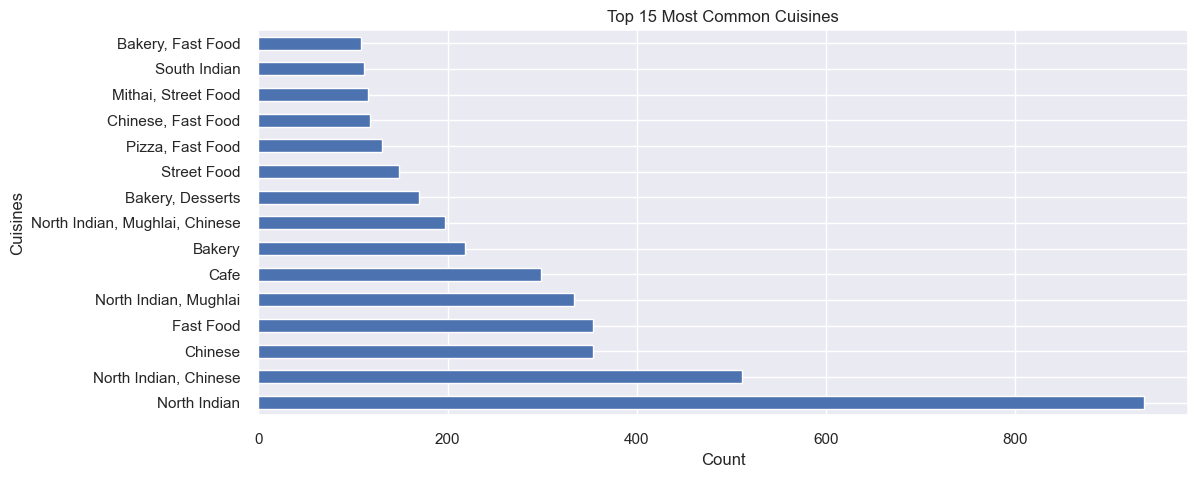

In [34]:
plt.figure(figsize=(12,5))
df['Cuisines'].value_counts().head(15).plot(kind='barh')
plt.title("Top 15 Most Common Cuisines")
plt.xlabel("Count")
plt.show()


### Interpretation: Top 15 Most Common Cuisines
The visualization highlights the 15 most frequently offered cuisines in the dataset.
Several important insights can be drawn from this distribution:

**1. “North Indian” is the dominant cuisine**

North Indian cuisine appears far more frequently than any other, with nearly 900+ restaurants offering it.
This indicates:
- High consumer demand
- Large concentration of North Indian restaurants in market-heavy cities like New Delhi, Gurgaon, and Noida


**2. Multi-cuisine combinations are extremely common**

When we look at the Cuisines column, many restaurants do not offer just one cuisine.
Instead, they combine multiple cuisines together in their menu.
like:
- North Indian, Chinese
- North Indian, Mughlai, Chinese
- Chinese, Fast Food

This suggests that Restaurants usually offer more than one type of food,
They don’t specialize in only one cuisine.
They mix cuisines to attract different types of customers(broader customer base).

**3. Fast food, Chinese, and bakery items also rank high**

These cuisines appear frequently due to their:
- High popularity
- Low preparation time
- Broad target audience

**4. Regional specialities like South Indian and Mithai are present but less dominant**

Cuisines such as South Indian and Mitha(indian sweets) do appear in the dataset, but not as frequently as North Indian or multi-cuisine combinations.
This suggests that:
 1. Regional demand patterns
These cuisines may be more popular in specific states (e.g., South Indian in Bengaluru/Chennai, Mithai in North India), but the dataset might not have many entries from those regions.
 2. Dataset concentration in specific cities (mostly NCR)
Since the dataset is dominated by New Delhi/NCR restaurants, cuisines commonly found in other regions appear less often.
 3. Market preference for broader multi-cuisine menus
Many restaurants prefer offering multiple cuisine options to attract a wider customer base, reducing the share of speciality-only cuisine restaurants.

**5. Street Food also ranks well**

Street Food being among the top cuisines reflects:
Strong local food culture,Popularity of affordable quick dishes,
Dense food stall clusters in cities like Delhi.

### Conclusion
The cuisine analysis clearly shows that:
North Indian cuisine is the most prominent,
Multi-cuisine menus dominate the restaurant landscape,
Chinese, Fast Food, and Bakery are also widely available,
Regional cuisines are present but contribute less to the overall distribution.

This provides a strong understanding of the restaurant market and helps inform later tasks like geospatial analysis (Task 3) and predictive modeling (Level 3).

# ***TASK 3 — GEOSPATIAL ANALYSIS***

1. Visualize the locations of restaurants on a
map using latitude and longitude
information.
2. Analyze the distribution of restaurants
across different cities or countries.
3. Determine if there is any correlation
between the restaurant's location and its
rating.

### $ Scatter Plot $ $  of Restaurant Locations $

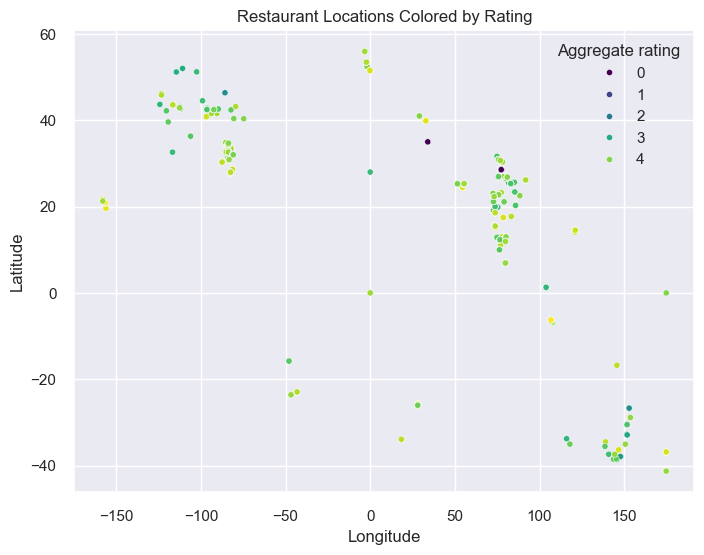

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Aggregate rating', palette='viridis', s=20)
plt.title("Restaurant Locations Colored by Rating")
plt.show()


### $  Location  $  vs  $  Rating $   $  Correlation $

In [36]:
corr = df[['Longitude','Latitude','Aggregate rating']].corr()
corr


,Longitude,Latitude,Aggregate rating
Longitude,1.000000,0.043207,-0.116818
Latitude,0.043207,1.000000,0.000516
Aggregate rating,-0.116818,0.000516,1.000000


**goal :**  check if a restaurant’s physical location affects its rating or not
### Interpretation: Location vs Rating Correlation

The correlation matrix shows how geographical coordinates (longitude and latitude) relate to the restaurant ratings.
The key observations are:

1. Very weak correlation between Longitude and Latitude
The value 0.0432 indicates almost no relationship between the east–west and north–south positions of restaurants.
This is expected because locations vary widely across cities and countries.

2. Longitude vs Aggregate Rating

- Slight negative correlation (-0.1168) This is a very weak negative correlation, meaning:
- This value is very close to zero, so A restaurant's left/right position on the map does NOT affect its rating.

3. Latitude vs Aggregate Rating
- Almost zero correlation (0.0005) This value is extremely close to zero.
- It shows that: North–south positioning Has no relationship with restaurant ratings

#### Conclusion
There is no significant linear relationship between a restaurant’s physical location (latitude/longitude) and its customer rating.
This suggests that:
Ratings are driven by food quality, service, pricing, customer experience, etc.
Not by the exact coordinates of the restaurant



# $ Level 1 $: $ Final $ $ Report $
Level 1 focused on developing a clear understanding of the dataset through exploration, cleaning, and basic analysis. The main objectives were to investigate the structure of the data, evaluate data quality, and derive initial insights about restaurant characteristics.

 - The dataset contained 21 columns with information related to restaurant details 
-  Only the Cuisines column had minor missing values (0.09%), which were handled; all other columns had no missing data.
-  Datatypes were correct and consistent
-  Aggregate ratings showed a moderate imbalance, with many restaurants rated 3.0–4.5
-  Descriptive analysis  reveled  New Delhi, Gurgaon, and Noida were the top cities with the highest number of restaurants, suggesting that the dataset is heavily centered around the NCR region.(not a good sample which represents entire restaurent population)
-  Descriptive analysis also revealed popular cuisines : North Indian is the most common cuisine, followed by multi-cuisine combinations and Chinese/Fast Food.
- Geospatial visualization showed restaurant distribution and Correlation analysis showed no meaningful relationship between location coordinates and restaurant ratings.which means  Ratings are influenced more by service and food quality than by raw geographic position.

# $ Conclusion $

since The dataset is largely clean, well-organized, therfore can be  ready for advanced tasks such as feature engineering and predictive modeling in Level 2 and Level 3.


